# Optimize Strategy Parameters with Ginetic Algorithm
Reference:<br>
(1) https://medium.com/swlh/how-to-optimize-your-strategy-parameters-with-genetic-algorithms-23671d7b446c<br>
(2) https://medium.com/analytics-vidhya/stock-price-prediction-using-genetic-algorithms-65c64b002d9

In this script, it demonstrates 3 ways to perform GA to figure out the optimized RSI (Lower Threshold and Upper Thrshold) for trading strategies.

(1) Method 1: It illustrates the theory behind the GA and it builds the GA algorithm from scratch.<br>
(2) Method 2: It uses package "geneticalgorithm 1.0.2"<br>
(3) Method 3: It uses package "TAGenAlgo"<br>

In the implementation, we will use Method3.

### Import Package

In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import tagenalgo as tg
from tagenalgo import TAGenAlgo
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'tagenalgo'

## Method 1

### Step 1 : Initialization

In [ ]:
import random
import operator

pop = []
for i in range(10):
    pop_val=[]
    for j in range(3):
        if j==0:
            param_ring = random.randint(0,100)
        elif j==1:
            param_ring = random.randint(param_ring,100)
        else:
            param_ring = random.randint(7,30)
        pop_val.append(param_ring)
    pop.append(pop_val)
print("Population:")
print(pop)

### Step 2: Calculate of fitness value

In [273]:
def fit_evaluate(X):
    cummulative = 0
    inventory = []
    # Initialize RSI Indicator
    df_eth = pd.read_csv('cryptos_eth.csv',
                         usecols=["timestamp_val", "high_value", "low_value", "close_value"])
    indicator_rsi = RSIIndicator(close=df_eth['close_value'],  window= X[2], fillna = True)
    X_train=np.array(df_eth['close_value'].tolist())
    #X_train=X_train[X[2]:]
    #indicator_rsi=indicator_rsi.rsi()[X[2]:]
    for rsi,data in zip(indicator_rsi.rsi(),X_train):
        if rsi<X[0]:
            inventory.append(data)
        elif rsi>X[1] and len(inventory)>0:
            bought_price = inventory.pop(0)
            reward = max(data - bought_price, 0)
            cummulative += data - bought_price
            #print("Sell: " + str(data) + " | Profit: " + str(data - bought_price))
    return(cummulative)

### Step 3 : Genes Selection
#Tournament Selection <br>
#Algorithm --<br>
#1.Select k individuals from the population and perform a tournament amongst them <br>
#2.Select the best individual from the k individuals <br>
#3. Repeat process 1 and 2 until you have the desired amount of population <br>

In [274]:
def _selection(fitnessResults, tournament_size,size_fitness):
    selection_final=[]
    for i in range(tournament_size):
        contenders=[]
        for i in range(0,3):
            contenders.append(random.randint(0,size_fitness-1))
        selected_parent_lst = []
        for i in contenders:
            #select 3
            selected_parent_lst.append(fitnessResults[i])
        #selected_parent_lst=dict(selected_parent_lst)
    
        #for i in range(len(selected_parent_lst)):
        contenders_fit = [i[0] for i in selected_parent_lst]
        contenders_params = [i[1] for i in selected_parent_lst]
        contenders_index = int(np.argmax(contenders_fit))
        selection_final.append(contenders_params[contenders_index])
    return selection_final
    #    selected_parent_lst.append(selected_parent)
    #selected_parentA = selected_parent_lst[0]
    #selected_parentB = selected_parent_lst[1]
    #return selected_parentA, selected_parentB

### Step 4 Operations of chromosomes - Crossover

In [275]:
def crossover(selection):
    for i in range(2):
        variable_selection=random.randint(0,2)
        variable1=random.randint(0,4)
        variable2=random.randint(0,4)
        temp=selection[variable1][variable_selection]
        selection[variable1][variable_selection]=selection[variable2][variable_selection]
        selection[variable2][variable_selection]=temp
        if selection[variable1][0]>selection[variable1][1]:
            temp=selection[variable1][0]
            selection[variable1][0]=selection[variable1][1]
            selection[variable1][1]=temp
        if selection[variable2][0]>selection[variable2][1]:
            temp=selection[variable2][0]
            selection[variable2][0]=selection[variable2][1]
            selection[variable2][1]=temp
    return selection

### Step 5 Operations of Chromosomes - Mutation

In [276]:
#No Mutation

### Step6 1 Generation Loop

In [277]:
import random
import operator

pop = []
for i in range(10):
    pop_val=[]
    for j in range(3):
        if j==0:
            param_ring = random.randint(0,100)
        elif j==1:
            param_ring = random.randint(param_ring,100)
        else:
            param_ring = random.randint(7,30)
        pop_val.append(param_ring)
    pop.append(pop_val)
print("Population:")
print(pop)

# Calculate fitness Value
cummulative_o=[]
fitnessResults={}
for pop1 in pop:
    cummulative = fit_evaluate(pop1)
    cummulative_o.append(cummulative)
for key,value in zip(cummulative_o,pop):
    fitnessResults[key] = value
len_fitness=len(fitnessResults)
fitnessResults=sorted(fitnessResults.items(), key = operator.itemgetter(0), reverse = True)
print("Calculate fitness")
print(fitnessResults)

#Tournament Selection
#Algorithm --
#1.Select k individuals from the population and perform a tournament amongst them
#2.Select the best individual from the k individuals
#3. Repeat process 1 and 2 until you have the desired amount of population
selection=_selection(fitnessResults, 5, len_fitness)
print("Selection")
print(selection)

#crossover
crossover1 =crossover(selection)
print("crossover")
print(crossover1)

#no mutation

Population:
[[80, 95, 26], [44, 97, 29], [20, 78, 26], [87, 93, 20], [20, 22, 19], [43, 80, 13], [22, 75, 18], [28, 34, 26], [43, 52, 14], [79, 86, 22]]
Calculate fitness
[(168072.49000000002, [43, 80, 13]), (12340.679999999928, [43, 52, 14]), (6352.6900000000005, [79, 86, 22]), (1818.479999999999, [22, 75, 18]), (779.7499999999998, [20, 78, 26]), (764.7399999999983, [28, 34, 26]), (718.64, [87, 93, 20]), (420.7599999999995, [20, 22, 19]), (90.33999999999997, [80, 95, 26]), (0, [44, 97, 29])]
Selection
[[43, 80, 13], [79, 86, 22], [43, 52, 14], [43, 80, 13], [43, 80, 13]]
crossover
[[43, 86, 13], [79, 80, 14], [43, 52, 22], [43, 86, 13], [43, 86, 13]]


### Step7 Perform loop to Run GA

In [278]:
import random
import operator

pop = []
for i in range(10):
    pop_val=[]
    for j in range(3):
        if j==0:
            param_ring = random.randint(0,100)
        elif j==1:
            param_ring = random.randint(param_ring,100)
        else:
            param_ring = random.randint(7,30)
        pop_val.append(param_ring)
    pop.append(pop_val)

#10 generation
for i in range(10):
    # Calculate fitness Value
    cummulative_o=[]
    fitnessResults={}
    for pop1 in pop:
        cummulative = fit_evaluate(pop1)
        cummulative_o.append(cummulative)
    for key,value in zip(cummulative_o,pop):
        fitnessResults[key] = value
    size_fitness=len(fitnessResults)
    fitnessResults=sorted(fitnessResults.items(), key = operator.itemgetter(0), reverse = True)

    #Tournament Selection
    #Algorithm --
    #1.Select k individuals from the population and perform a tournament amongst them
    #2.Select the best individual from the k individuals
    #3. Repeat process 1 and 2 until you have the desired amount of population
    selection=_selection(fitnessResults, 5,size_fitness)
    #crossover
    crossover1 =crossover(selection)

    #no mutation
    
    #Create next population
    pop = crossover1
    for i in range(7):
        pop_val=[]
        for j in range(3):
            if j==0 or j==1:
                param_ring = random.randint(0,100)
            else:
                param_ring = random.randint(7,30)
            pop_val.append(param_ring)
        pop.append(pop_val)

In [279]:
#Evaluate the latest population group
cummulative_o=[]
fitnessResults={}
for pop1 in pop:
    cummulative = fit_evaluate(pop1)
    cummulative_o.append(cummulative)
for key,value in zip(cummulative_o,pop):
    fitnessResults[key] = value
size_fitness=len(fitnessResults)
fitnessResults=sorted(fitnessResults.items(), key = operator.itemgetter(0), reverse = True)
    
print(fitnessResults[0])

(2990435.4999999832, [41, 66, 7])


### Step 6 Implementation using package "geneticalgorithm 1.0.2"
Documentation : https://pypi.org/project/geneticalgorithm/

In [44]:
import numpy as np
import pandas as pd
from geneticalgorithm import geneticalgorithm as ga

df_eth = pd.read_csv('cryptos_eth.csv',
                         usecols=["timestamp_val", "high_value", "low_value", "close_value"])
#asset_price = np.array(df_eth['close_value'].tolist())
X_train, X_test = train_test_split(df_eth['close_value'], shuffle=False)

In [67]:
from ta.momentum import RSIIndicator

def f(X):
    cummulative = 0
    inventory = []
    # Initialize RSI Indicator
    df_eth = pd.read_csv('cryptos_eth.csv',
                         usecols=["timestamp_val", "high_value", "low_value", "close_value"])
    indicator_rsi = RSIIndicator(close=df_eth['close_value'],  window= X[2], fillna = True)
    X_train=np.array(df_eth['close_value'].tolist())
    #X_train=X_train[X[2]:]
    #indicator_rsi=indicator_rsi.rsi()[X[2]:]
    for rsi,data in zip(indicator_rsi.rsi(),X_train):
        if rsi<X[0]:
            inventory.append(data)
        elif rsi>X[1] and len(inventory)>0:
            bought_price = inventory.pop(0)
            reward = max(data - bought_price, 0)
            cummulative += data - bought_price
            #print("Sell: " + str(data) + " | Profit: " + str(data - bought_price))
    return -cummulative

 The best solution found:                                                                           
 [53. 40. 30.]

 Objective function:
 -6668713.470000004


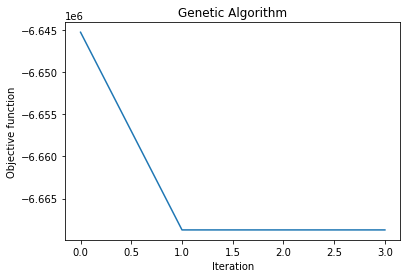

In [69]:
varbound=np.array([[0,100],[0,100],[7,30]])

algorithm_param = {'max_num_iteration': 3,\
                   'population_size':100,\
                   'mutation_probability':0,\
                   'elit_ratio': 0,\
                   'crossover_probability': 0.9,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

model=ga(function=f,dimension=3,variable_type='int',variable_boundaries=varbound,algorithm_parameters=algorithm_param)

model.run()

### Step 6 Implementation

In [11]:
df_eth = pd.read_csv('cryptos_eth.csv',
                         usecols=["timestamp_val", "high_value", "low_value", "close_value"])
asset_price = np.array(df_eth['close_value'].tolist())
X_train, X_test = train_test_split(asset_price, shuffle=False)
X_train_ret = DataFrame(X_train, columns=['price']).pct_change()['price'].tolist()

# Input the required parameters and name of strategy.
model = TAGenAlgo(price=X_train, generations=3, population_size=100, crossover_prob=0.9, mutation_prob=0, method='single', strategy='rsi')

# Initialize the model by setting the range of indicators.
_, init_pop = model.ta_initialize(indicator_set={'rsi': {'window': [5, 180], 'down_thres': [5, 50], 'up_thres': [51, 90]}})

In [10]:
model.fit(init_pop)
model.predict(X_test)

    |   Individual Performance    |                  Parameters                  |
---- ----------------------------- ---------------------------------------------- ----
 Gen    Expected Return       Win% rsi_window  rsi_down_thres  rsi_up_thres 
   0             3.7708       0.75         11              49            52 
   1             3.7708       0.75       11.0            49.0          52.0 
   2             3.7708       0.75       11.0            49.0          52.0 
The Predicted Strategy Return: 0.584332716921869
The Predicted Win Rate: 0.7399395770392749


(0.584332716921869, 0.7399395770392749)

### Step 7 Comparison between common and modified parameters setting for RSI Strategy

In [12]:
%matplotlib inline
import talib
import matplotlib.pyplot as plt
from matplotlib import style

In [13]:
# return of underlying asset
asset_cum = tg.strategy_cum_ret(np.array(X_train_ret))

# common parameters set for rsi strategy (window=14, low_threshold=30, high_threshold=70)
rsi = talib.RSI(X_train, timeperiod = 14)
rsi_sig = tg.rsi_signal(X_train, rsi, 30, 70, 0.03)
rsi_ret = tg.strategy_ret(rsi_sig, X_train_ret)
rsi_cum = tg.strategy_cum_ret(rsi_ret)

In [16]:
# modified parameters set for rsi strategy (window=10, low_threshold=31, high_threshold=88)
mod_rsi = talib.RSI(X_train, timeperiod = 11)
mod_rsi_sig = tg.rsi_signal(X_train, mod_rsi, 49, 52, 0.03)
mod_rsi_ret = tg.strategy_ret(mod_rsi_sig, X_train_ret)
mod_rsi_cum = tg.strategy_cum_ret(mod_rsi_ret)

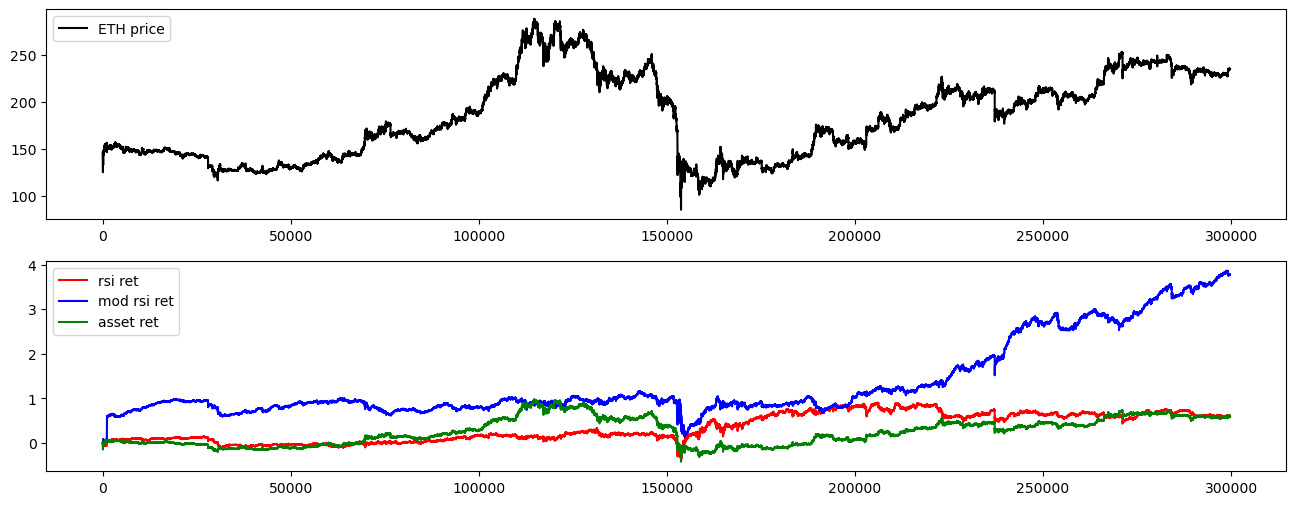

In [17]:
style.use('default')
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(np.array(X_train), color='k', label='ETH price')

ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(np.array(rsi_cum), label='rsi ret', color='r')
ax2.plot(np.array(mod_rsi_cum), label='mod rsi ret', color='b')
ax2.plot(np.array(asset_cum), label='asset ret', color='g')

ax1.legend(loc='upper left', prop={'size': 10})
ax2.legend(loc='upper left', prop={'size': 10})
plt.show()